# Proyek Analisis Data: Air Quality
- Nama: Intan Citra Phonskaningtyas
- Email: intanc110@gmail.com
- Id Dicoding: intan_citra_phonskaningtyas_ckmi
- Dataset: https://github.com/intancitra/air-quality/raw/main/Air-quality-dataset.zip

## Menentukan Pertanyaan Bisnis

- Apakah konsentrasi polutan di semua stasiun pada semua tahun memenuhi standar kualitas udara?
- Kapan periode dengan tingkat curah hujan tertinggi pada stasiun pengukuran ini biasanya terjadi setiap tahun?
- Kapan puncak suhu biasanya terjadi setiap tahun?

## Menyiapkan semua library yang dibutuhkan

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import requests
from zipfile import ZipFile
from io import BytesIO
import os

## Data Wrangling

### Gathering Data

In [ ]:
# Download the zip file
url = "https://github.com/intancitra/air-quality/raw/main/Air-quality-dataset.zip"
response = requests.get(url)
zip_file = ZipFile(BytesIO(response.content))

# Create the folder
!mkdir air_quality_dataset

# Extract the dataset
zip_file.extractall("air_quality_dataset")
zip_file.close()

mkdir: cannot create directory ‘air_quality_dataset’: File exists


In [ ]:
aotizhongxin_df = pd.read_csv("air_quality_dataset/PRSA_Data_20130301-20170228/PRSA_Data_Aotizhongxin_20130301-20170228.csv")
changping_df = pd.read_csv("air_quality_dataset/PRSA_Data_20130301-20170228/PRSA_Data_Changping_20130301-20170228.csv")
dingling_df = pd.read_csv("air_quality_dataset/PRSA_Data_20130301-20170228/PRSA_Data_Dingling_20130301-20170228.csv")
dongsi_df = pd.read_csv("air_quality_dataset/PRSA_Data_20130301-20170228/PRSA_Data_Dongsi_20130301-20170228.csv")
guanyuan_df = pd.read_csv("air_quality_dataset/PRSA_Data_20130301-20170228/PRSA_Data_Guanyuan_20130301-20170228.csv")
gucheng_df = pd.read_csv("air_quality_dataset/PRSA_Data_20130301-20170228/PRSA_Data_Gucheng_20130301-20170228.csv")
huairou_df = pd.read_csv("air_quality_dataset/PRSA_Data_20130301-20170228/PRSA_Data_Huairou_20130301-20170228.csv")
nongzhanguan_df = pd.read_csv("air_quality_dataset/PRSA_Data_20130301-20170228/PRSA_Data_Nongzhanguan_20130301-20170228.csv")
shunyi_df = pd.read_csv("air_quality_dataset/PRSA_Data_20130301-20170228/PRSA_Data_Shunyi_20130301-20170228.csv")
tiantan_df = pd.read_csv("air_quality_dataset/PRSA_Data_20130301-20170228/PRSA_Data_Tiantan_20130301-20170228.csv")
wanliu_df = pd.read_csv("air_quality_dataset/PRSA_Data_20130301-20170228/PRSA_Data_Wanliu_20130301-20170228.csv")
wanshouxigong_df = pd.read_csv("air_quality_dataset/PRSA_Data_20130301-20170228/PRSA_Data_Wanshouxigong_20130301-20170228.csv")

In [ ]:
df = pd.concat([aotizhongxin_df,changping_df,dingling_df,dongsi_df, guanyuan_df, gucheng_df,huairou_df,nongzhanguan_df,shunyi_df,tiantan_df,wanliu_df,wanshouxigong_df], ignore_index=True)

In [ ]:
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


### Assessing Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB


In [ ]:
print("Jumlah duplikasi: ", df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
df.isna().sum()

No             0
year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64

In [ ]:
df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,412029.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,420370.000000,420375.000000,420365.000000,420378.000000,420450.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,1.729711
std,10122.116943,1.177198,3.448707,8.800102,6.922195,80.822391,91.772426,21.650603,35.127912,1160.182716,56.661607,11.436139,10.474055,13.793847,0.821004,1.246386
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


In [ ]:
df.wd.value_counts()

NE     43335
ENE    34142
NW     32600
N      30869
E      29752
SW     28756
NNE    28232
NNW    25326
WNW    24375
ESE    24220
SSW    22563
SE     20074
WSW    20040
S      19405
SSE    17694
W      17563
Name: wd, dtype: int64

In [ ]:
df.station.value_counts()

Aotizhongxin     35064
Changping        35064
Dingling         35064
Dongsi           35064
Guanyuan         35064
Gucheng          35064
Huairou          35064
Nongzhanguan     35064
Shunyi           35064
Tiantan          35064
Wanliu           35064
Wanshouxigong    35064
Name: station, dtype: int64

### Cleaning Data

In [ ]:
col_list = df.columns.to_list()
col_list = [col for col in col_list if col not in ['No','year','month','day','hour','station']]

Masih terdapat missing data pada beberapa variabel, yakitu CO, O3, NO2, SO2, PM2.5, PM10, wd, DEWP, TEMP, PRES, RAIN, dan WSPM. Maka dilakukan _handling missing data_ pada variabel-variabel tersebut.

In [ ]:
# Addressing missing value

## Variabel Kategorik
df['wd'] = df['wd'].fillna(value="NE")

## Variabel Numerik
num_col = [col for col in col_list if col not in ['wd']]
df[num_col] = df[num_col].fillna(value=df[num_col].median())

In [ ]:
df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

Tidak ada missing value dalam dataset.

In [ ]:
# Konversi data ke datetime
df['date'] = pd.to_datetime(df[['year', 'month', 'day']])

# Set 'date' as the index
df.set_index('date', inplace=True)

In [ ]:
df.to_csv('all_data.csv', index=False)

In [ ]:
# Group data by month
monthly_data = df[num_col].resample('M').mean()
monthly_data.head()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
date,,,,,,,,,,,
2013-03-31,104.625672,128.717686,38.285982,67.313491,1420.110215,56.387590,5.992249,1012.224373,-6.682090,0.023768,1.886414
2013-04-30,62.086227,95.828819,20.614506,46.175328,902.883218,61.348644,12.380058,1007.811817,-3.203681,0.014294,2.333310
2013-05-31,80.890009,129.808356,24.939006,50.222684,983.023746,83.671420,21.676691,1002.652912,8.131384,0.005791,1.811694
2013-06-30,101.236053,115.835012,13.625159,48.160256,1332.907755,74.453136,23.583426,999.639838,17.433322,0.126528,1.287350
2013-07-31,67.381608,76.558244,7.410275,39.613153,932.234991,78.634546,27.108826,995.501680,20.902184,0.275448,1.316913


In [ ]:
monthly_data.to_csv('monthly_data.csv',index=True)

In [ ]:
# Group data by year
yearly_data = df[num_col].resample('Y').mean()
yearly_data.head()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
date,,,,,,,,,,,
2013-12-31,79.690762,102.643632,19.811372,52.306097,1158.959048,56.781579,15.689826,1007.734572,5.473082,0.066097,1.599129
2014-12-31,84.743827,115.363450,20.395507,54.199469,1245.319635,57.780836,13.915842,1010.641436,2.742042,0.049793,1.637802
2015-12-31,79.128489,103.328938,12.923995,48.083699,1252.036720,58.979411,13.435780,1011.115541,2.629642,0.075997,1.771572
2016-12-31,71.567642,94.408916,9.747913,46.319169,1133.563866,57.098721,13.575369,1011.224441,2.161314,0.075975,1.844674
2017-12-31,92.090631,110.728166,17.976401,57.114995,1581.591337,39.995468,0.487422,1021.773663,-13.330944,0.002813,1.997252


In [ ]:
yearly_data.to_csv('yearly_data.csv',index=True)

In [ ]:
# Group data by days
daily_data = df[num_col].resample('D').mean()
daily_data.head()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
date,,,,,,,,,,,
2013-03-01,7.326389,12.739583,9.232639,24.704861,417.013889,67.996528,1.173958,1026.569792,-20.148611,0.0,2.917708
2013-03-02,31.475694,40.760417,31.660656,56.466957,947.527778,32.621946,0.260417,1026.552778,-16.271875,0.0,1.145139
2013-03-03,79.291667,111.104167,49.239583,76.076389,1770.274306,22.788194,5.257292,1014.215278,-12.325347,0.0,1.463194
2013-03-04,22.309028,40.888889,18.764872,43.125415,729.118056,56.833333,9.610764,1017.263194,-12.773264,0.0,2.227083
2013-03-05,127.868056,159.236111,69.993056,100.215278,2015.364583,79.527778,6.630556,1010.551389,-7.916319,0.0,0.992014


In [ ]:
daily_data.to_csv('daily_data.csv',index=True)

In [ ]:
# Print summary statistics for each variable
summary_statistics = monthly_data.describe()
print(summary_statistics)

            PM2.5        PM10        SO2        NO2           CO          O3  \
count   48.000000   48.000000  48.000000  48.000000    48.000000   48.000000   
mean    79.308732  104.231304  15.689078  50.404861  1214.704856   56.885755   
std     24.952847   27.164647  12.181813  12.356018   473.152372   28.763869   
min     42.935824   56.560943   2.903002  30.098678   661.323925   15.273380   
25%     60.940812   82.060159   6.640026  39.812490   842.044691   29.614157   
50%     72.515457   98.552356  12.657371  50.561970  1088.290584   52.955027   
75%     93.399074  125.584335  19.964536  61.121505  1461.401830   82.044278   
max    148.774530  158.948029  52.809648  77.370072  2702.161738  106.787963   

            TEMP         PRES       DEWP       RAIN       WSPM  
count  48.000000    48.000000  48.000000  48.000000  48.000000  
mean   13.478695  1010.795322   2.419623   0.064122   1.730527  
std    10.474824     8.788541  12.540534   0.086232   0.341691  
min    -4.576232   

## Exploratory Data Analysis (EDA)

### Explore Air Quality Dataset

In [ ]:
df.sample(5)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
date,,,,,,,,,,,,,,,,,,
2015-09-09,22132,2015,9,9,3,46.0,55.0,3.0,44.0,900.0,69.0,20.3,1008.0,14.9,0.0,NNW,1.2,Changping
2015-07-13,20741,2015,7,13,4,56.0,72.0,2.0,12.0,200.0,136.0,25.0,988.7,16.2,0.0,NW,1.3,Dingling
2016-10-06,31562,2016,10,6,1,103.0,123.0,3.0,64.0,1500.0,2.0,13.2,1018.6,12.4,0.0,ENE,0.8,Dongsi
2013-12-07,6757,2013,12,7,12,284.0,298.0,104.0,116.0,4700.0,4.0,5.4,1015.5,-2.9,0.0,E,1.8,Tiantan
2015-10-16,23026,2015,10,16,9,112.0,165.0,9.0,103.0,1800.0,3.0,17.3,1010.8,9.0,0.0,WNW,0.5,Changping


In [ ]:
df.describe(include="all")

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768,420768.000000,420768
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,12
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,NaN,Aotizhongxin
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45157,NaN,35064
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.278489,104.256193,15.641507,50.418633,1214.493362,56.981874,13.539885,1010.746658,2.491405,0.064416,NaN,1.729461,NaN
std,10122.116943,1.177198,3.448707,8.800102,6.922195,80.056799,91.108745,21.455419,34.642023,1133.542988,55.802413,11.430768,10.469168,13.787252,0.820626,NaN,1.245947,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,NaN,0.000000,NaN
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,21.000000,36.000000,3.000000,24.000000,500.000000,12.000000,3.100000,1002.300000,-8.900000,0.000000,NaN,0.900000,NaN
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,NaN,1.400000,NaN
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,109.000000,144.000000,19.000000,70.000000,1500.000000,80.000000,23.200000,1019.000000,15.100000,0.000000,NaN,2.200000,NaN


In [ ]:
df.RAIN.sample(10)

date
2016-01-19    0.0
2015-09-18    0.0
2016-04-04    0.0
2014-07-27    0.0
2016-11-06    0.0
2016-10-02    0.0
2016-05-08    0.0
2015-02-14    0.0
2016-09-02    0.0
2013-07-26    0.0
Name: RAIN, dtype: float64

## Visualization & Explanatory Analysis

In [ ]:
sns.set_theme = "darkgrid"

### Apakah konsentrasi polutan di semua stasiun pada semua tahun memenuhi standar kualitas udara?

Standar polutan untuk kualitas udara diatur oleh organisasi dan badan pengatur lingkungan di berbagai negara. Setiap negara mungkin memiliki standar yang berbeda-beda. Berikut adalah daftar untuk standar polutan di Negara China.
1. PM2.5 (Particulate Matter with a diameter of 2.5 micrometers or smaller):
- 24-hour average: 75 micrograms per cubic meter (μg/m³)
- Annual average: 35 μg/m³
2. PM10 (Particulate Matter with a diameter of 10 micrometers or smaller):
- 24-hour average: 150 μg/m³
- Annual average: 70 μg/m³
3. SO2 (Sulfur Dioxide):
- 24-hour average: 150 μg/m³
4. NO2 (Nitrogen Dioxide):
- 24-hour average: 80 μg/m³
5. CO (Carbon Monoxide):
- 24-hour average: 4 mg/m³

#### PM2.5

In [ ]:
# Group by 'station' and calculate the median for each variable
station_stats = (df.groupby(['station','year']))['PM2.5'].agg(['median','mean']).reset_index()
station_stats_above_med = station_stats[station_stats['median']>35]
station_stats_below_med = station_stats[station_stats['median']<=35]
station_stats_above = station_stats[station_stats['mean']>35]
station_stats_below = station_stats[station_stats['mean']<=35]

# Display the resulting DataFrame
print(station_stats_below)
print(station_stats_below_med)

Empty DataFrame
Columns: [station, year, median, mean]
Index: []
     station  year  median       mean
14  Dingling  2017    31.0  68.280367
34   Huairou  2017    33.0  74.047316


Dari output tersebut, dapat disimpulkan bahwa untuk **rata-rata** keseluruhan tiap tahunnya, **tidak ada stasiun yang memenuhi standar kualitas udara**.

Sedangkan jika diambil dari **median**, hanya **stasiun Dingling dan Huairou pada tahun 2017** yang memenuhi standar kualitas udara.

In [ ]:
# Group by 'station' and calculate the median for each variable
daily_station_stats = (df.groupby(['station','year','month','day']))['PM2.5'].agg(['median','mean']).reset_index()
daily_station_stats_above_med = daily_station_stats[daily_station_stats['median']>75]
daily_station_stats_below_med = daily_station_stats[daily_station_stats['median']<=75]
daily_station_stats_above = daily_station_stats[daily_station_stats['mean']>75]
daily_station_stats_below = daily_station_stats[daily_station_stats['mean']<=75]

# Display the resulting DataFrame
print(daily_station_stats_below)
print(daily_station_stats_below_med)

             station  year  month  day  median       mean
0       Aotizhongxin  2013      3    1     6.0   7.125000
1       Aotizhongxin  2013      3    2    23.5  30.750000
3       Aotizhongxin  2013      3    4    15.5  22.708333
8       Aotizhongxin  2013      3    9    59.0  62.041667
9       Aotizhongxin  2013      3   10    29.0  34.291667
...              ...   ...    ...  ...     ...        ...
17527  Wanshouxigong  2017      2   24    23.0  39.958333
17528  Wanshouxigong  2017      2   25     9.0  16.875000
17529  Wanshouxigong  2017      2   26    25.5  31.416667
17530  Wanshouxigong  2017      2   27    56.0  66.500000
17531  Wanshouxigong  2017      2   28    11.0  10.958333

[10530 rows x 6 columns]
             station  year  month  day  median       mean
0       Aotizhongxin  2013      3    1     6.0   7.125000
1       Aotizhongxin  2013      3    2    23.5  30.750000
3       Aotizhongxin  2013      3    4    15.5  22.708333
8       Aotizhongxin  2013      3    9    59.0

Dari hasil tersebut, ingin pula diketahui persentase kegagalan untuk ketercapaian seluruh stasiun dalam memenuhi standar PM2.5 untuk kualitas udara.

In [ ]:
year_percentage = len(station_stats_above)/len(station_stats)*100
year_percentage_med = len(station_stats_above_med)/len(station_stats)*100
print(f"Persentase tahunan stasiun yang tidak memenuhi standar PM2.5 untuk kualitas udara berdasarkan:")
print(f"Rata-rata: {year_percentage}%")
print(f"Median: {year_percentage_med:.2f}%")

Persentase tahunan stasiun yang tidak memenuhi standar PM2.5 untuk kualitas udara berdasarkan:
Rata-rata: 100.0%
Median: 96.67%


In [ ]:
daily_percentage = len(daily_station_stats_above)/len(daily_station_stats)*100
daily_percentage_med = len(daily_station_stats_above_med)/len(daily_station_stats)*100
print(f"Persentase harian stasiun yang tidak memenuhi standar PM2.5 untuk kualitas udara berdasarkan:")
print(f"Rata-rata: {daily_percentage}%")
print(f"Median: {daily_percentage_med:.2f}%")

Persentase harian stasiun yang tidak memenuhi standar PM2.5 untuk kualitas udara berdasarkan:
Rata-rata: 39.93839835728953%
Median: 36.50%


**Plot Harian Berdasarkan Rata-Rata**

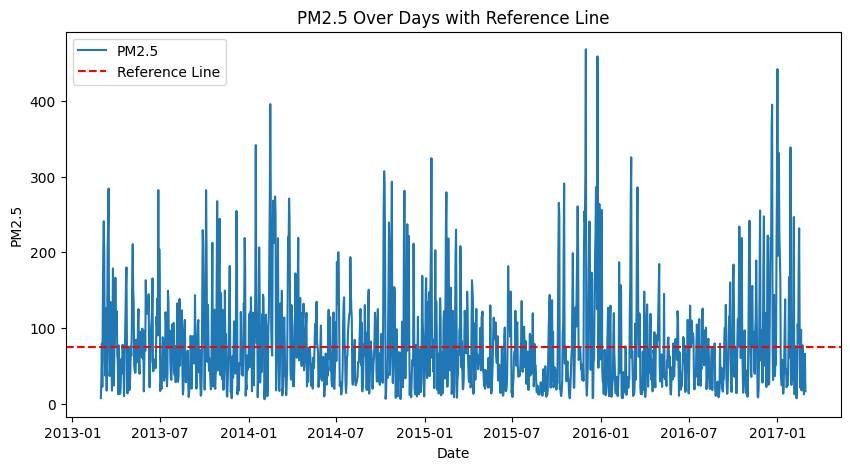

In [ ]:
column = 'PM2.5'
plt.figure(figsize=(10, 5))

# Buat Line Plot
sns.lineplot(x=daily_data.index, y=daily_data[column], label=column)

# Tambahkan garis referensi dengan nilai standar PM 2.5, yaitu 75
plt.axhline(y=75, color='red', linestyle='--', label='Reference Line')

plt.title(f'{column} Over Days with Reference Line')
plt.xlabel('Date')
plt.ylabel(column)
plt.legend()
plt.show()

**Plot Harian Berdasarkan Median**

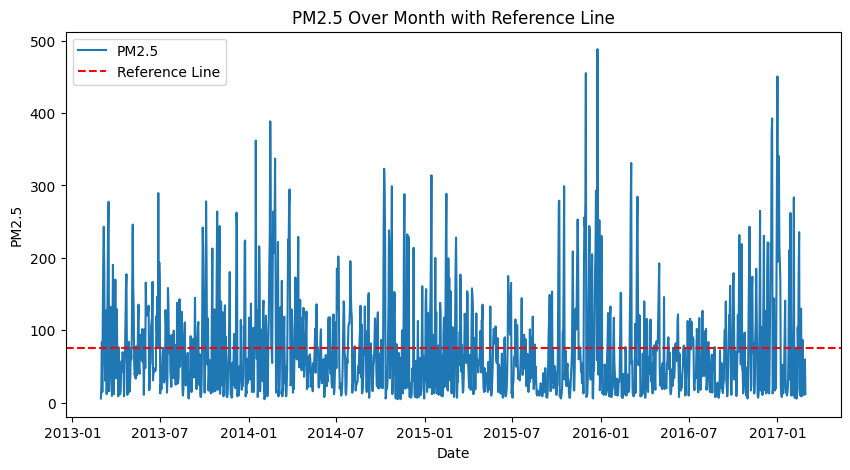

In [ ]:
column = 'PM2.5'
daily_data_med = df[num_col].resample('D').median()
plt.figure(figsize=(10, 5))

# Buat Line Plot
sns.lineplot(x=daily_data_med.index, y=daily_data_med[column], label=column)

# Tambahkan garis referensi dengan nilai standar PM 2.5, yaitu 75
plt.axhline(y=75, color='red', linestyle='--', label='Reference Line')

plt.title(f'{column} Over Month with Reference Line')
plt.xlabel('Date')
plt.ylabel(column)
plt.legend()
plt.show()

#### PM10

In [ ]:
column = 'PM10'
standard = 150

In [ ]:
# Group by 'station' and calculate the median for each variable
station_stats = (df.groupby(['station','year']))[column].agg(['median','mean']).reset_index()
station_stats_above_med = station_stats[station_stats['median']>70]
station_stats_below_med = station_stats[station_stats['median']<=70]
station_stats_above = station_stats[station_stats['mean']>70]
station_stats_below = station_stats[station_stats['mean']<=70]

# Display the resulting DataFrame
print(station_stats_below)
print(station_stats_below_med)

Empty DataFrame
Columns: [station, year, median, mean]
Index: []
         station  year  median        mean
4   Aotizhongxin  2017    67.0  107.060734
7      Changping  2015    70.0   93.762123
8      Changping  2016    66.0   86.284153
9      Changping  2017    57.0   94.247881
10      Dingling  2013    59.0   78.727260
11      Dingling  2014    70.0   90.315811
12      Dingling  2015    60.0   85.331267
13      Dingling  2016    60.0   80.477345
14      Dingling  2017    45.0   78.639831
32       Huairou  2015    66.0   89.333721
33       Huairou  2016    61.0   82.254098
34       Huairou  2017    51.0   91.922316
43        Shunyi  2016    69.0   87.308060
44        Shunyi  2017    62.0  106.913136


Dari output tersebut, dapat disimpulkan bahwa untuk **rata-rata** keseluruhan tiap tahunnya, **tidak ada stasiun yang memenuhi standar kualitas udara**.

Sedangkan jika diambil dari **median**, hanya **stasiun Dingling dan Huairou pada tahun 2017** yang memenuhi standar kualitas udara.

In [ ]:
# Group by 'station' and calculate the median for each variable
daily_station_stats = (df.groupby(['station','year','month','day']))[column].agg(['median','mean']).reset_index()
daily_station_stats_above_med = daily_station_stats[daily_station_stats['median']>standard]
daily_station_stats_below_med = daily_station_stats[daily_station_stats['median']<=standard]
daily_station_stats_above = daily_station_stats[daily_station_stats['mean']>standard]
daily_station_stats_below = daily_station_stats[daily_station_stats['mean']<=standard]

# Display the resulting DataFrame
print(daily_station_stats_below)
print(daily_station_stats_below_med)

             station  year  month  day  median        mean
0       Aotizhongxin  2013      3    1     7.5   10.750000
1       Aotizhongxin  2013      3    2    29.5   42.083333
2       Aotizhongxin  2013      3    3   118.0  120.541667
3       Aotizhongxin  2013      3    4    33.5   44.583333
9       Aotizhongxin  2013      3   10    63.0   68.916667
...              ...   ...    ...  ...     ...         ...
17527  Wanshouxigong  2017      2   24    28.0   48.916667
17528  Wanshouxigong  2017      2   25    16.5   26.791667
17529  Wanshouxigong  2017      2   26    39.0   48.916667
17530  Wanshouxigong  2017      2   27    82.0   88.000000
17531  Wanshouxigong  2017      2   28    20.5   21.541667

[13962 rows x 6 columns]
             station  year  month  day  median        mean
0       Aotizhongxin  2013      3    1     7.5   10.750000
1       Aotizhongxin  2013      3    2    29.5   42.083333
2       Aotizhongxin  2013      3    3   118.0  120.541667
3       Aotizhongxin  2013    

Dari hasil tersebut, ingin pula diketahui persentase kegagalan untuk ketercapaian seluruh stasiun dalam memenuhi standar PM2.5 untuk kualitas udara.

In [ ]:
year_percentage = len(station_stats_above)/len(station_stats)*100
year_percentage_med = len(station_stats_above_med)/len(station_stats)*100
print(f"Persentase tahunan stasiun yang tidak memenuhi standar {column} untuk kualitas udara berdasarkan:")
print(f"Rata-rata: {year_percentage}%")
print(f"Median: {year_percentage_med:.2f}%")

Persentase tahunan stasiun yang tidak memenuhi standar PM10 untuk kualitas udara berdasarkan:
Rata-rata: 100.0%
Median: 76.67%


In [ ]:
daily_percentage = len(daily_station_stats_above)/len(daily_station_stats)*100
daily_percentage_med = len(daily_station_stats_above_med)/len(daily_station_stats)*100
print(f"Persentase harian stasiun yang tidak memenuhi standar {column} untuk kualitas udara berdasarkan:")
print(f"Rata-rata: {daily_percentage}%")
print(f"Median: {daily_percentage_med:.2f}%")

Persentase harian stasiun yang tidak memenuhi standar PM10 untuk kualitas udara berdasarkan:
Rata-rata: 20.362765229295004%
Median: 19.51%


**Plot Harian Berdasarkan Rata-Rata**

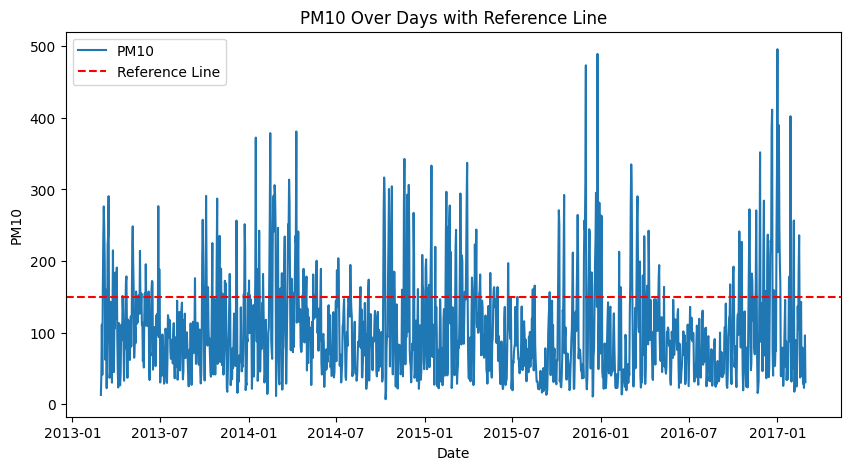

In [ ]:
plt.figure(figsize=(10, 5))

# Buat Line Plot
sns.lineplot(x=daily_data.index, y=daily_data[column], label=column)

# Tambahkan garis referensi dengan nilai standar
plt.axhline(y=standard, color='red', linestyle='--', label='Reference Line')

plt.title(f'{column} Over Days with Reference Line')
plt.xlabel('Date')
plt.ylabel(column)
plt.legend()
plt.show()

**Plot Harian Berdasarkan Median**

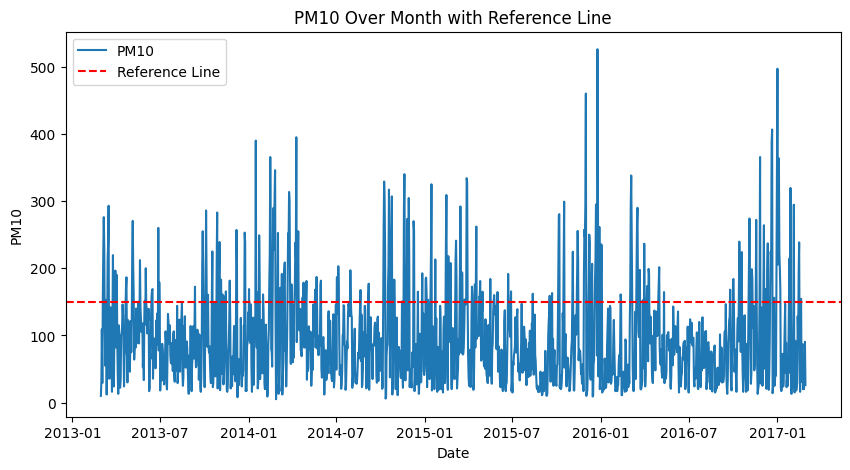

In [ ]:
daily_data_med = df[num_col].resample('D').median()
plt.figure(figsize=(10, 5))

# Buat Line Plot
sns.lineplot(x=daily_data_med.index, y=daily_data_med[column], label=column)

# Tambahkan garis referensi dengan nilai standar
plt.axhline(y=standard, color='red', linestyle='--', label='Reference Line')

plt.title(f'{column} Over Month with Reference Line')
plt.xlabel('Date')
plt.ylabel(column)
plt.legend()
plt.show()

#### SO2

In [ ]:
column = 'SO2'
standard = 150

In [ ]:
# Group by 'station' and calculate the median for each variable
daily_station_stats = (df.groupby(['station','year','month','day']))[column].agg(['median','mean']).reset_index()
daily_station_stats_above_med = daily_station_stats[daily_station_stats['median']>standard]
daily_station_stats_below_med = daily_station_stats[daily_station_stats['median']<=standard]
daily_station_stats_above = daily_station_stats[daily_station_stats['mean']>standard]
daily_station_stats_below = daily_station_stats[daily_station_stats['mean']<=standard]

# Display the resulting DataFrame
print(daily_station_stats_below)
print(daily_station_stats_below_med)

             station  year  month  day  median       mean
0       Aotizhongxin  2013      3    1    11.0  11.708333
1       Aotizhongxin  2013      3    2    28.5  36.625000
2       Aotizhongxin  2013      3    3    65.5  61.291667
3       Aotizhongxin  2013      3    4    18.0  22.208333
4       Aotizhongxin  2013      3    5    94.0  93.875000
...              ...   ...    ...  ...     ...        ...
17527  Wanshouxigong  2017      2   24     7.0   9.250000
17528  Wanshouxigong  2017      2   25     3.0   3.958333
17529  Wanshouxigong  2017      2   26     7.0   8.583333
17530  Wanshouxigong  2017      2   27    11.5  13.750000
17531  Wanshouxigong  2017      2   28     4.0   5.041667

[17531 rows x 6 columns]
             station  year  month  day  median       mean
0       Aotizhongxin  2013      3    1    11.0  11.708333
1       Aotizhongxin  2013      3    2    28.5  36.625000
2       Aotizhongxin  2013      3    3    65.5  61.291667
3       Aotizhongxin  2013      3    4    18.0

Dari hasil tersebut, ingin pula diketahui persentase kegagalan untuk ketercapaian seluruh stasiun dalam memenuhi standar PM2.5 untuk kualitas udara.

In [ ]:
daily_percentage = len(daily_station_stats_above)/len(daily_station_stats)*100
daily_percentage_med = len(daily_station_stats_above_med)/len(daily_station_stats)*100
print(f"Persentase harian stasiun yang tidak memenuhi standar {column} untuk kualitas udara berdasarkan:")
print(f"Rata-rata: {daily_percentage}%")
print(f"Median: {daily_percentage_med:.2f}%")

Persentase harian stasiun yang tidak memenuhi standar SO2 untuk kualitas udara berdasarkan:
Rata-rata: 0.005703855806525211%
Median: 0.06%


**Plot Harian Berdasarkan Rata-Rata**

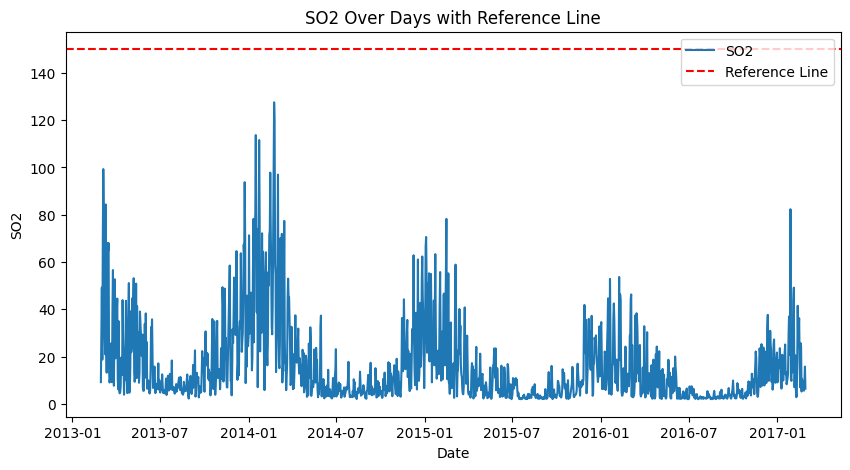

In [ ]:
plt.figure(figsize=(10, 5))

# Buat Line Plot
sns.lineplot(x=daily_data.index, y=daily_data[column], label=column)

# Tambahkan garis referensi dengan nilai standar
plt.axhline(y=standard, color='red', linestyle='--', label='Reference Line')

plt.title(f'{column} Over Days with Reference Line')
plt.xlabel('Date')
plt.ylabel(column)
plt.legend()
plt.show()

**Plot Harian Berdasarkan Median**

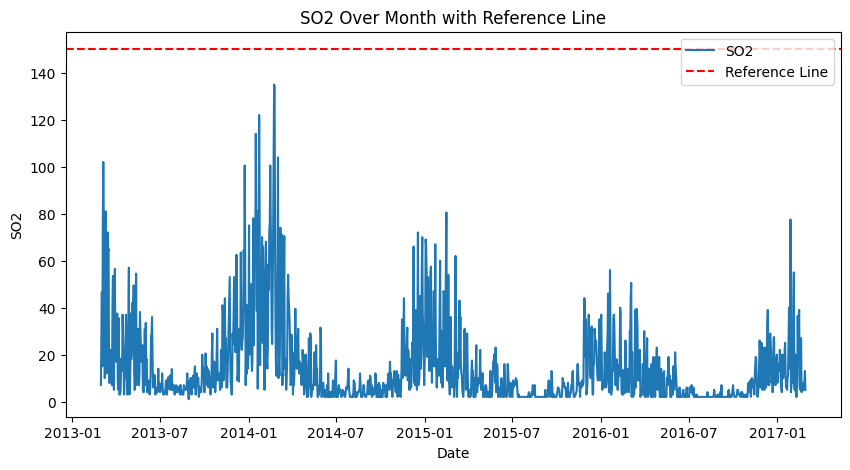

In [ ]:
daily_data_med = df[num_col].resample('D').median()
plt.figure(figsize=(10, 5))

# Buat Line Plot
sns.lineplot(x=daily_data_med.index, y=daily_data_med[column], label=column)

# Tambahkan garis referensi dengan nilai standar
plt.axhline(y=standard, color='red', linestyle='--', label='Reference Line')

plt.title(f'{column} Over Month with Reference Line')
plt.xlabel('Date')
plt.ylabel(column)
plt.legend()
plt.show()

#### NO2

In [ ]:
column = 'NO2'
standard = 80

In [ ]:
# Group by 'station' and calculate the median for each variable
daily_station_stats = (df.groupby(['station','year','month','day']))[column].agg(['median','mean']).reset_index()
daily_station_stats_above_med = daily_station_stats[daily_station_stats['median']>standard]
daily_station_stats_below_med = daily_station_stats[daily_station_stats['median']<=standard]
daily_station_stats_above = daily_station_stats[daily_station_stats['mean']>standard]
daily_station_stats_below = daily_station_stats[daily_station_stats['mean']<=standard]

# Display the resulting DataFrame
print(daily_station_stats_below)
print(daily_station_stats_below_med)

             station  year  month  day  median       mean
0       Aotizhongxin  2013      3    1    14.5  22.583333
1       Aotizhongxin  2013      3    2    61.0  66.666667
3       Aotizhongxin  2013      3    4    43.0  46.791667
8       Aotizhongxin  2013      3    9    15.5  45.000000
9       Aotizhongxin  2013      3   10    48.0  49.666667
...              ...   ...    ...  ...     ...        ...
17527  Wanshouxigong  2017      2   24    39.5  52.041667
17528  Wanshouxigong  2017      2   25    34.5  33.041667
17529  Wanshouxigong  2017      2   26    57.0  56.666667
17530  Wanshouxigong  2017      2   27    86.0  79.375000
17531  Wanshouxigong  2017      2   28    34.5  31.875000

[15095 rows x 6 columns]
             station  year  month  day  median       mean
0       Aotizhongxin  2013      3    1    14.5  22.583333
1       Aotizhongxin  2013      3    2    61.0  66.666667
3       Aotizhongxin  2013      3    4    43.0  46.791667
8       Aotizhongxin  2013      3    9    15.5

Dari hasil tersebut, ingin pula diketahui persentase kegagalan untuk ketercapaian seluruh stasiun dalam memenuhi standar PM2.5 untuk kualitas udara.

In [ ]:
daily_percentage = len(daily_station_stats_above)/len(daily_station_stats)*100
daily_percentage_med = len(daily_station_stats_above_med)/len(daily_station_stats)*100
print(f"Persentase harian stasiun yang tidak memenuhi standar {column} untuk kualitas udara berdasarkan:")
print(f"Rata-rata: {daily_percentage}%")
print(f"Median: {daily_percentage_med:.2f}%")

Persentase harian stasiun yang tidak memenuhi standar NO2 untuk kualitas udara berdasarkan:
Rata-rata: 13.900296600501939%
Median: 13.56%


**Plot Harian Berdasarkan Rata-Rata**

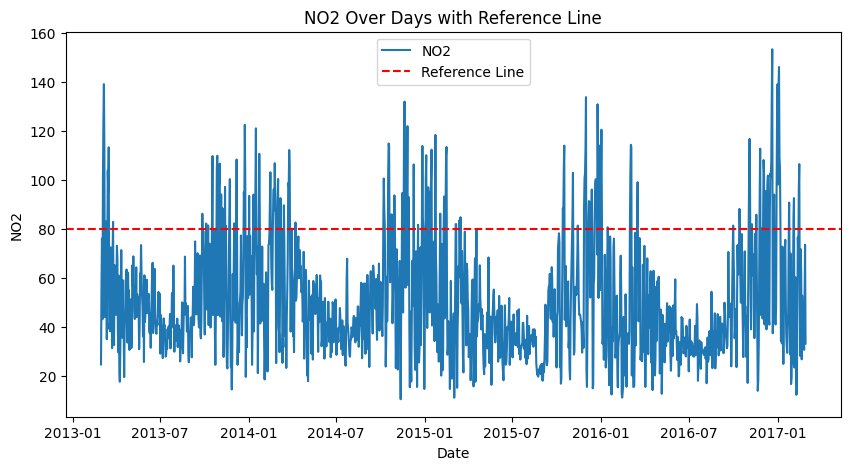

In [ ]:
plt.figure(figsize=(10, 5))

# Buat Line Plot
sns.lineplot(x=daily_data.index, y=daily_data[column], label=column)

# Tambahkan garis referensi dengan nilai standar
plt.axhline(y=standard, color='red', linestyle='--', label='Reference Line')

plt.title(f'{column} Over Days with Reference Line')
plt.xlabel('Date')
plt.ylabel(column)
plt.legend()
plt.show()

**Plot Harian Berdasarkan Median**

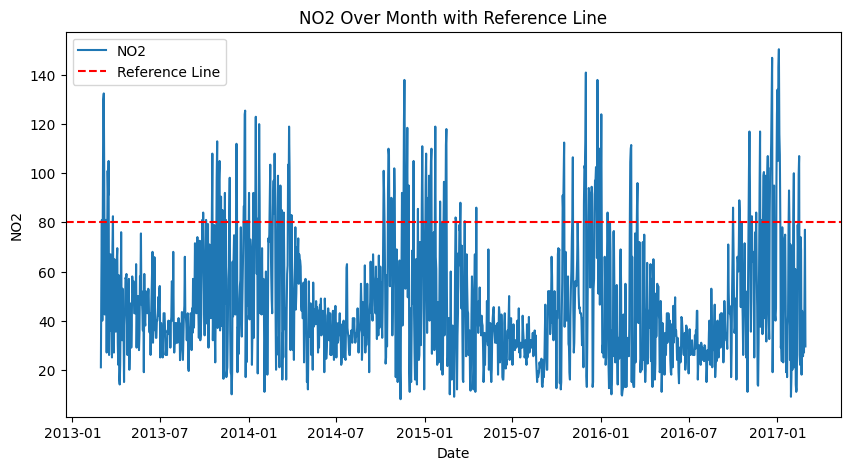

In [ ]:
daily_data_med = df[num_col].resample('D').median()
plt.figure(figsize=(10, 5))

# Buat Line Plot
sns.lineplot(x=daily_data_med.index, y=daily_data_med[column], label=column)

# Tambahkan garis referensi dengan nilai standar
plt.axhline(y=standard, color='red', linestyle='--', label='Reference Line')

plt.title(f'{column} Over Month with Reference Line')
plt.xlabel('Date')
plt.ylabel(column)
plt.legend()
plt.show()

#### CO

In [ ]:
column = 'CO'
standard = 4

In [ ]:
# Group by 'station' and calculate the median for each variable
daily_station_stats = (df.groupby(['station','year','month','day']))[column].agg(['median','mean']).reset_index()
daily_station_stats_above_med = daily_station_stats[daily_station_stats['median']>standard]
daily_station_stats_below_med = daily_station_stats[daily_station_stats['median']<=standard]
daily_station_stats_above = daily_station_stats[daily_station_stats['mean']>standard]
daily_station_stats_below = daily_station_stats[daily_station_stats['mean']<=standard]

# Display the resulting DataFrame
print(daily_station_stats_below)
print(daily_station_stats_below_med)

Empty DataFrame
Columns: [station, year, month, day, median, mean]
Index: []
Empty DataFrame
Columns: [station, year, month, day, median, mean]
Index: []


Dari hasil tersebut, ingin pula diketahui persentase kegagalan untuk ketercapaian seluruh stasiun dalam memenuhi standar PM2.5 untuk kualitas udara.

In [ ]:
year_percentage = len(station_stats_above)/len(station_stats)*100
year_percentage_med = len(station_stats_above_med)/len(station_stats)*100
print(f"Persentase tahunan stasiun yang tidak memenuhi standar {column} untuk kualitas udara berdasarkan:")
print(f"Rata-rata: {year_percentage}%")
print(f"Median: {year_percentage_med:.2f}%")

Persentase tahunan stasiun yang tidak memenuhi standar CO untuk kualitas udara berdasarkan:
Rata-rata: 100.0%
Median: 76.67%


In [ ]:
daily_percentage = len(daily_station_stats_above)/len(daily_station_stats)*100
daily_percentage_med = len(daily_station_stats_above_med)/len(daily_station_stats)*100
print(f"Persentase harian stasiun yang tidak memenuhi standar {column} untuk kualitas udara berdasarkan:")
print(f"Rata-rata: {daily_percentage}%")
print(f"Median: {daily_percentage_med:.2f}%")

Persentase harian stasiun yang tidak memenuhi standar CO untuk kualitas udara berdasarkan:
Rata-rata: 100.0%
Median: 100.00%


**Plot Harian Berdasarkan Rata-Rata**

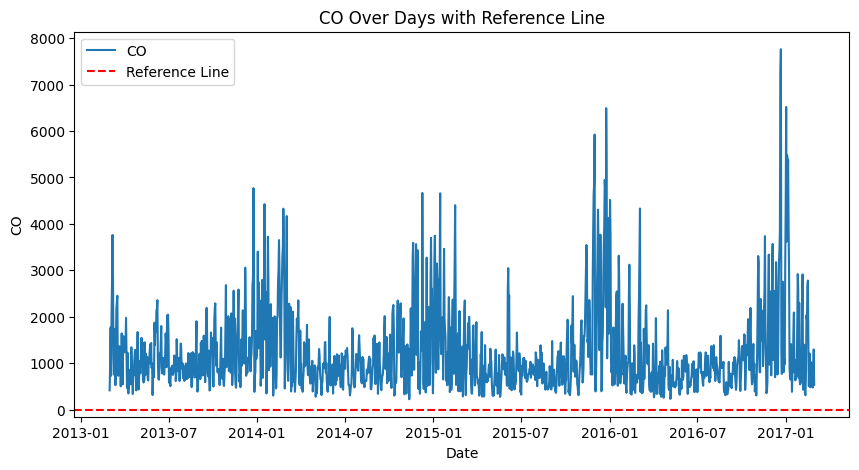

In [ ]:
plt.figure(figsize=(10, 5))

# Buat Line Plot
sns.lineplot(x=daily_data.index, y=daily_data[column], label=column)

# Tambahkan garis referensi dengan nilai standar
plt.axhline(y=standard, color='red', linestyle='--', label='Reference Line')

plt.title(f'{column} Over Days with Reference Line')
plt.xlabel('Date')
plt.ylabel(column)
plt.legend()
plt.show()

**Plot Harian Berdasarkan Median**

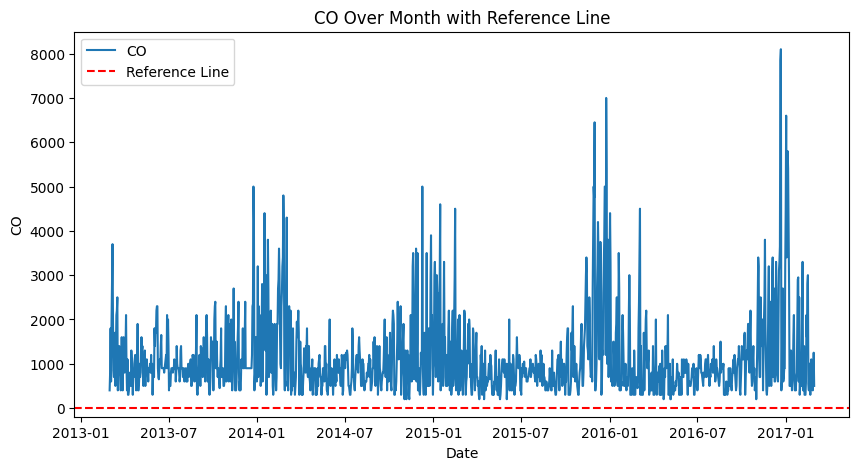

In [ ]:
daily_data_med = df[num_col].resample('D').median()
plt.figure(figsize=(10, 5))

# Buat Line Plot
sns.lineplot(x=daily_data_med.index, y=daily_data_med[column], label=column)

# Tambahkan garis referensi dengan nilai standar
plt.axhline(y=standard, color='red', linestyle='--', label='Reference Line')

plt.title(f'{column} Over Month with Reference Line')
plt.xlabel('Date')
plt.ylabel(column)
plt.legend()
plt.show()

### Kapan periode dengan tingkat curah hujan tertinggi pada stasiun pengukuran ini biasanya terjadi setiap tahun?

Untuk menjawab pertanyaan ini, kita perlu melihat dari plotnya apakah terdapat pola yang jelas dalam curah hujan.

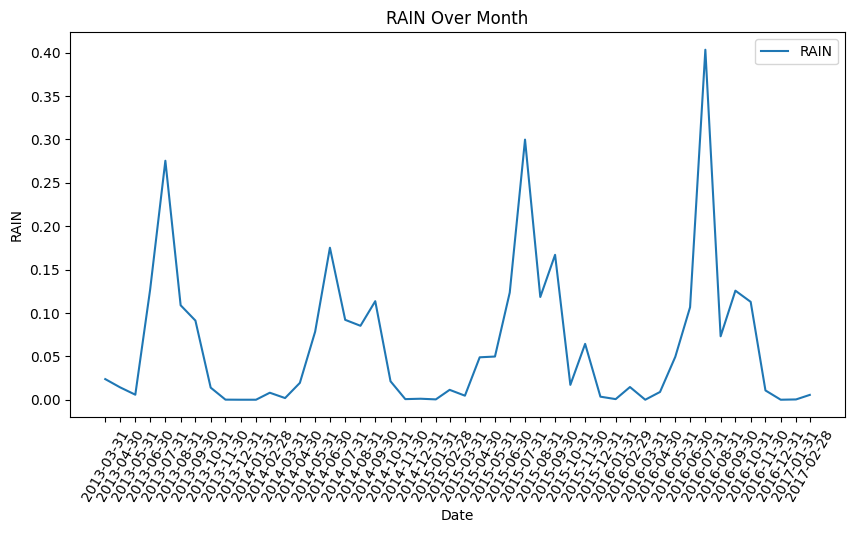

In [ ]:
column = 'RAIN'
plt.figure(figsize=(10, 5))

# Buat Lineplot
sns.lineplot(x=monthly_data.index, y=monthly_data[column], label=column)

# Kustomisasi label x-axis agar keseluruhannya dapat terlihat
plt.xticks(rotation=60, ha='center')
plt.xticks(monthly_data.index)

plt.title(f'{column} Over Month')
plt.xlabel('Date')
plt.ylabel(column)
plt.legend()  # Show legend with labels
plt.show()

Berdasarkan plot tersebut, dapat dilihat bahwa curah hujan memiliki pola seasonal yang berulang tiap tahunnya. Melihat pola tersebut, dapat diketahui bahwa curah hujan tertinggi selalu berada di rentang **bulan Juni hingga September**.

### Kapan puncak suhu (TEMP) biasanya terjadi setiap tahun?

Untuk menjawab pertanyaan ini, kita perlu melihat dari plotnya apakah terdapat pola yang jelas untuk suhu.

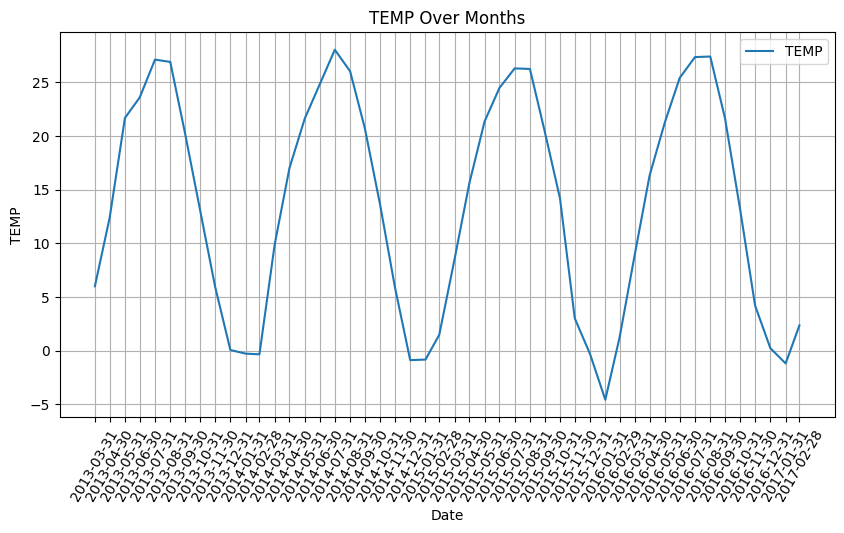

In [ ]:
column = 'TEMP'
plt.figure(figsize=(10, 5))

# Buat Lineplot
sns.lineplot(x=monthly_data.index, y=monthly_data[column], label=column)

# Kustomisasi label x-axis agar keseluruhannya dapat terlihat
plt.xticks(rotation=60, ha='center')
plt.xticks(monthly_data.index)

plt.grid(True)

plt.title(f'{column} Over Months')
plt.xlabel('Date')
plt.ylabel(column)
plt.legend()  # Show legend with labels
plt.show()

Berdasarkan plot tersebut, dapat dilihat bahwa temperatur memiliki pola seasonal yang berulang tiap tahunnya. Melihat pola tersebut, dapat diketahui bahwa temperatur tertinggi selalu berada di rentang **bulan April hingga Juli**.

## Conclusion

**Pertanyaan 1:**
1. Dapat disimpulkan bahwa untuk **rata-rata** keseluruhan tiap tahunnya, **tidak ada stasiun yang memenuhi standar kualitas udara**.
2. Sedangkan jika diambil dari **median**, hanya **stasiun Dingling dan Huairou pada tahun 2017** yang memenuhi standar kualitas udara.

**Pertanyaan 2:**
- Curah hujan tertinggi pada rentang **bulan Juni hingga September.**


**Pertanyaan 3:**
- Temperatur tertinggi berada pada rentang **bulan April hingga Juli**.
